In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/West_Nile_Virus__WNV__Mosquito_Test_Results.csv")
df.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [3]:
df.select_dtypes('O')

,BLOCK,TRAP,TRAP_TYPE,TEST DATE,RESULT,SPECIES,LOCATION
0,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,negative,CULEX PIPIENS/RESTUANS,NaN
1,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,negative,CULEX PIPIENS/RESTUANS,NaN
2,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,positive,CULEX PIPIENS/RESTUANS,NaN
3,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,positive,CULEX PIPIENS/RESTUANS,NaN
4,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,negative,CULEX PIPIENS/RESTUANS,NaN
...,...,...,...,...,...,...,...
29484,22XX W 113TH ST,T086,GRAVID,08/07/2007 12:08:00 AM,negative,CULEX PIPIENS/RESTUANS,"(41.688170589570205, -87.67825167603604)"
29485,58XX N WESTERN AVE,T028,GRAVID,08/25/2009 12:08:00 AM,negative,CULEX PIPIENS/RESTUANS,"(41.98724460846669, -87.68941677018957)"
29486,109XX S COTTAGE GROVE AVE,T102,GRAVID,07/25/2013 12:07:00 AM,negative,CULEX RESTUANS,"(41.695494070048184, -87.60908176561364)"
29487,73XX S CICERO AVE,T067,GRAVID,08/21/2007 12:08:00 AM,negative,CULEX PIPIENS/RESTUANS,"(41.7600823529196, -87.74160716098964)"


In [4]:
df['TRAP_TYPE'] = df['TRAP_TYPE'].astype('category')
df['TRAP_TYPE'] = df['TRAP_TYPE'].cat.codes

In [5]:
### Normalize or standardize this attribute.

means = np.mean(df['TRAP_TYPE'],axis=0)
std = np.std(df['TRAP_TYPE'], axis=0)
df['TRAP_TYPE'] = (df['TRAP_TYPE'] - means)/std

In [7]:
df.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,0.084552,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,0.084552,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,0.084552,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,0.084552,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,0.084552,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


### Transform a second attribute from numeric to 5 categories: xs -- s -- m -- l -- xl. Put these values into their OWN column.

In [8]:
bins = np.linspace(df['NUMBER OF MOSQUITOES'].min(),df['NUMBER OF MOSQUITOES'].max(),6)
print(bins)
labels = ['xs','s','m','l','xl']
df['NUMBER OF MOSQUITOES'] = pd.cut(df['NUMBER OF MOSQUITOES'], bins=bins, labels=labels, include_lowest=True)
df.head()

[ 1.  16.2 31.4 46.6 61.8 77. ]


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,0.084552,09/25/2014 12:09:00 AM,xs,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,0.084552,09/15/2016 12:09:00 AM,m,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,0.084552,08/17/2017 12:08:00 AM,l,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,0.084552,08/17/2017 12:08:00 AM,s,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,0.084552,09/15/2016 12:09:00 AM,xs,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


### In a third attribute, find all the missing values and substitute them with "null"

In [9]:
df['LONGITUDE'].isnull().sum()

4416

In [10]:
df['LONGITUDE'].fillna("null",inplace=True)
df['LONGITUDE'].isnull().sum()

0

###Perform a 5-number summary for another numerical attribute.

In [11]:
df['WEEK'].describe()

count    29489.000000
mean        31.073587
std          4.533390
min         20.000000
25%         28.000000
50%         31.000000
75%         35.000000
max         40.000000
Name: WEEK, dtype: float64

In [13]:
print([i for i in x.columns if x[i].dtype=='object'])

['BLOCK', 'TRAP', 'TEST DATE', 'RESULT', 'SPECIES', 'LONGITUDE', 'LOCATION']


In [46]:
col = ['BLOCK', 'TRAP', 'TRAP_TYPE', 'TEST DATE','SPECIES', 'LONGITUDE', 'LOCATION','LATITUDE','RESULT']

for i in col:
  df[i] = df[i].astype('category')
  df[i] = df[i].cat.codes

In [47]:
x = df.drop(['NUMBER OF MOSQUITOES'],axis=1)
y=df['NUMBER OF MOSQUITOES']

### Split the dataset into 80% training set and 20% test set with sampling

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20)

### Split the dataset into 75% training set and 25% test set with sampling

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=4)
for train_index, test_index in kf.split(x):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 7373  7374  7375 ... 29486 29487 29488] TEST: [   0    1    2 ... 7370 7371 7372]
TRAIN: [    0     1     2 ... 29486 29487 29488] TEST: [ 7373  7374  7375 ... 14742 14743 14744]
TRAIN: [    0     1     2 ... 29486 29487 29488] TEST: [14745 14746 14747 ... 22114 22115 22116]
TRAIN: [    0     1     2 ... 22114 22115 22116] TEST: [22117 22118 22119 ... 29486 29487 29488]


In [30]:
df.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,1,171,1,284,xs,0,2,0,162,0
1,2016,37,44219,1,171,1,260,m,0,2,0,162,0
2,2017,33,45351,1,174,1,190,l,1,2,0,162,0
3,2017,33,45345,1,169,1,190,s,1,2,0,162,0
4,2016,37,44169,97,106,1,260,xs,0,2,0,162,0


### Pick the 3 most important attributes and make a correlation matrix

In [31]:
df[['TRAP','SPECIES','WEEK']].corr()

,TRAP,SPECIES,WEEK
TRAP,1.000000,-0.004161,-0.010129
SPECIES,-0.004161,1.000000,-0.159351
WEEK,-0.010129,-0.159351,1.000000


### Find a dependent attribute and build one of the options below

In [32]:
# Splitting into Training and Test Set
train_dataset = df.sample(frac=0.25, random_state=0)
test_dataset = df.drop(train_dataset.index)

# Splitting Features from Labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUMBER OF MOSQUITOES')
test_labels = test_features.pop('NUMBER OF MOSQUITOES')

In [33]:
# Encoding the output variable with pd.get_dummies
train_labels1 = pd.get_dummies(train_labels, columns=['NUMBER OF MOSQUITOES'], prefix='', prefix_sep='')
test_labels1 = pd.get_dummies(test_labels, columns=['NUMBER OF MOSQUITOES'], prefix='', prefix_sep='')

In [34]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
normalizer.mean.numpy()

array([[2.0124436e+03, 3.1052910e+01, 3.5016016e+04, 6.9684212e+01,
        9.1798859e+01, 9.7110701e-01, 1.5500320e+02, 8.8578410e-02,
        2.3307104e+00, 6.9125366e+01, 9.2731583e+01, 6.9125366e+01]],
      dtype=float32)

In [35]:
train_features.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
4109,2009,30,27563,1,185,1,139,0,1,0,162,0
22310,2011,37,32680,87,161,1,262,0,3,57,53,57
8422,2009,36,28029,113,28,1,257,0,3,89,26,89
22475,2013,34,37218,102,100,1,202,0,1,69,44,69
7016,2013,35,37297,111,24,1,221,0,3,147,79,147


In [36]:
import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

In [37]:
# define the Keras model
model = Sequential(normalizer)
model.add(Dense(12, input_dim=32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 12)                25        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 32)                416       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1818 (7.11 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 25 (104.00 Byte)
_____________________

In [38]:
%%time

# compile the Keras model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
# fit the Keras model on the dataset
model.fit(train_features, train_labels1, epochs=50, batch_size=10)

Epoch 1/50
738/738 [==============================] - 6s 4ms/step - loss: 0.8017 - accuracy: 0.7632
Epoch 2/50
738/738 [==============================] - 1s 2ms/step - loss: 0.7056 - accuracy: 0.7781
Epoch 3/50
738/738 [==============================] - 2s 3ms/step - loss: 0.6915 - accuracy: 0.7793
Epoch 4/50
738/738 [==============================] - 2s 3ms/step - loss: 0.6834 - accuracy: 0.7804
Epoch 5/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6776 - accuracy: 0.7790
Epoch 6/50
738/738 [==============================] - 2s 3ms/step - loss: 0.6718 - accuracy: 0.7804
Epoch 7/50
738/738 [==============================] - 2s 3ms/step - loss: 0.6658 - accuracy: 0.7807
Epoch 8/50
738/738 [==============================] - 2s 3ms/step - loss: 0.6631 - accuracy: 0.7798
Epoch 9/50
738/738 [==============================] - 2s 2ms/step - loss: 0.6563 - accuracy: 0.7827
Epoch 10/50
738/738 [==============================] - 1s 2ms/step - loss: 0.6529 - accuracy: 0.7836

In [39]:
# evaluate the keras model
accuracy = model.evaluate(test_features, test_labels1)
print('Accuracy: %.2f' % (accuracy[1]*100))

692/692 [==============================] - 2s 3ms/step - loss: 0.6879 - accuracy: 0.7782
Accuracy: 77.82


692/692 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     16626
           1       0.27      0.03      0.05      2317
           2       0.21      0.00      0.01      1259
           3       0.55      0.48      0.51      1914
           4       0.00      0.00      0.00         1

    accuracy                           0.78     22117
   macro avg       0.37      0.30      0.29     22117
weighted avg       0.69      0.78      0.71     22117



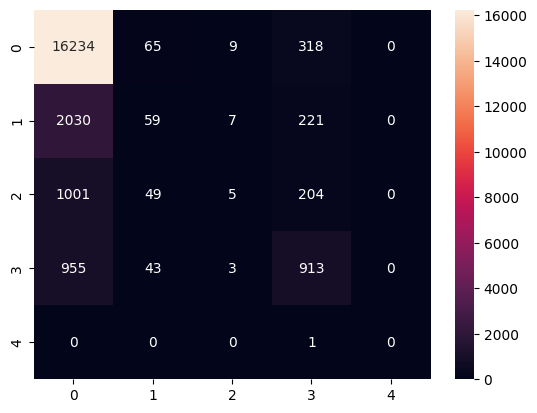

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(test_features)
sns.heatmap(confusion_matrix(np.argmax(np.array(test_labels1),axis=1),np.argmax(pred,axis=1)), annot=True, fmt='d')
print(classification_report(np.argmax(np.array(test_labels1),axis=1),np.argmax(pred,axis=1)))

In [42]:
from sklearn.cluster import KMeans

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


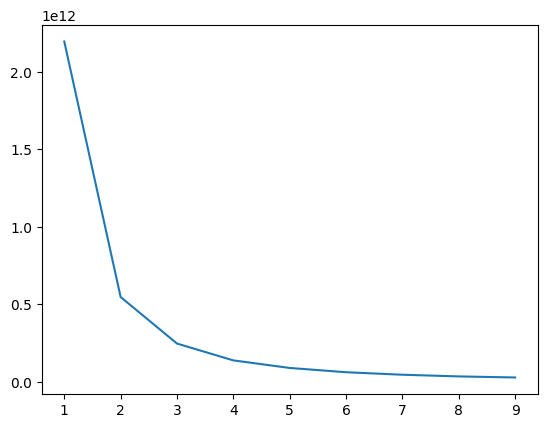

In [48]:
# Elbow method

def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(x,maxK=10)